# **Exploración del Dataset**

Para el desarrollo de un modelo de clasificación de correos electrónicos en **Spam** y **No Spam (Ham)** utilizando el algoritmo **Naive Bayes**, es fundamental realizar una exploración y preprocesamiento inicial del dataset. Esto asegura una mejor comprensión de los datos y permite identificar problemas o patrones que puedan influir en el desempeño del modelo. A continuación, se detalla el análisis realizado.

---

## **1. Propósito del Análisis**

El objetivo principal es:

- **Limpiar valores nulos** en el dataset para garantizar datos consistentes.
- **Explorar los rangos de palabras y caracteres** en cada clase (Spam y Ham).
- Identificar las **palabras más frecuentes** en cada categoría para entender su distribución.
- Proponer soluciones a singularidades que puedan afectar al modelo, ya que en este caso, **no se pueden aplicar métodos matemáticos tradicionales directamente.**

Para abordar estas tareas, utilizaremos técnicas específicas de procesamiento de lenguaje natural (NLP).

---

## **2. Técnicas de Preprocesamiento Utilizadas**

### **TF-IDF Vectorizer**
El análisis y modelado del texto se realiza utilizando **TF-IDF (Term Frequency-Inverse Document Frequency)**, una técnica común en **NLP** para convertir texto no estructurado en una representación numérica.

- **¿Qué es TF-IDF?**
  TF-IDF mide la importancia de una palabra dentro de un documento y su relevancia en comparación con otros documentos del dataset.  
  - **Frecuencia de términos (TF):** Proporción de veces que una palabra aparece en un documento.
  - **Frecuencia inversa de documentos (IDF):** Penaliza palabras comunes que aparecen en múltiples documentos (como "el", "y", "que").

- **¿Por qué usar TF-IDF?**
  TF-IDF es útil para identificar palabras que diferencian a los correos clasificados como Spam de aquellos clasificados como Ham, ayudando al modelo Naive Bayes a realizar predicciones más precisas.

---

## **3. Justificación del Análisis Exploratorio**

Antes de aplicar TF-IDF, realizamos un análisis exploratorio para:
- **Limpiar valores nulos:**  
  Dos registros del dataset presentaban valores nulos en la columna `text`. Estos registros se eliminaron para garantizar que todas las entradas sean válidas.

- **Visualizar la distribución de clases:**  
  Utilizamos gráficos para observar el balance entre correos etiquetados como Spam y Ham. Esto nos da un panorama inicial de los datos.

- **Estadísticas del texto:**  
  Calculamos el número de palabras y caracteres por correo, y analizamos estas métricas por clase. Esto permite identificar diferencias significativas entre los mensajes Spam y Ham.

---

## **4. Código Base**

### **Carga y Preprocesamiento del Dataset**

```python
# Cargar el dataset
import pandas as pd
dataset = pd.read_csv("dataset/spam_Emails_data.csv")

# Información del dataset
dataset.info()

# Eliminar valores nulos
dataset.dropna(inplace=True)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Cargar el dataset y aplicar preprocesamiento
dataset = pd.read_csv("dataset/spam_Emails_data.csv")

In [4]:
# 1. Información básica del dataset
print("Información del dataset: \n")
dataset.info()

print("\nDescripción del dataset: \n")
print(dataset.describe())

Información del dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB

Descripción del dataset: 

         label         text
count   193852       193850
unique       2       193848
top        Ham  unsubscribe
freq    102160            2


In [5]:
# 2. Visualización de valores nulos
print("\nValores nulos por columna:")
print(dataset.isnull().sum())



Valores nulos por columna:
label    0
text     2
dtype: int64


In [6]:
# Eliminar valores nulos
dataset.dropna(inplace=True)
print("Después de eliminar valores nulos: \n")
dataset.info()


Después de eliminar valores nulos: 

<class 'pandas.core.frame.DataFrame'>
Index: 193850 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193850 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


/tmp/ipykernel_42757/4064479688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='label', palette='cool')


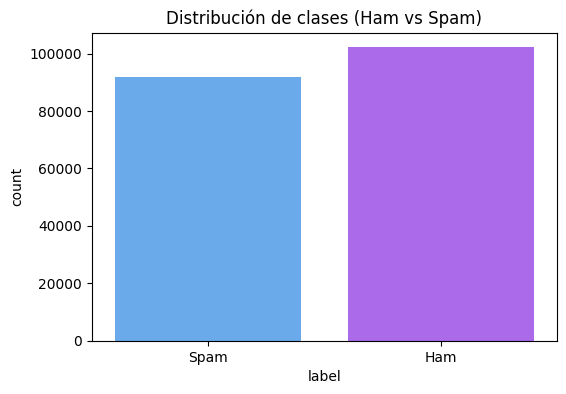

In [7]:
# 3. Distribución de la columna 'label'
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='label', palette='cool')
plt.title('Distribución de clases (Ham vs Spam)')
plt.show()


In [8]:
# 4. Análisis de texto
# Agregar columnas con métricas de texto
dataset['num_words'] = dataset['text'].apply(lambda x: len(x.split()))
dataset['num_chars'] = dataset['text'].apply(len)

In [9]:
# Estadísticas básicas de texto
print("\nEstadísticas básicas de longitud de texto:")
print(dataset[['num_words', 'num_chars']].describe())


Estadísticas básicas de longitud de texto:
          num_words     num_chars
count  1.938500e+05  1.938500e+05
mean   2.760373e+02  1.812779e+03
std    3.671773e+03  2.659510e+04
min    1.000000e+00  1.000000e+00
25%    5.500000e+01  3.620000e+02
50%    1.270000e+02  8.000000e+02
75%    2.800000e+02  1.803000e+03
max    1.585483e+06  1.151031e+07


In [27]:
# Estadísticas específicas por clase
print("\nRango de palabras por clase:")
for label in dataset['label'].unique():
    subset = dataset[dataset['label'] == label]
    print(f"Clase {label}:\n")
    print(subset[['num_words', 'num_chars']].describe(), "\n")


Rango de palabras por clase:
Clase Spam:

          num_words      num_chars
count  91691.000000   91691.000000
mean     210.818314    1415.085112
std      337.864413    2367.969268
min        1.000000       1.000000
25%       47.000000     309.000000
50%      106.000000     675.000000
75%      239.000000    1570.000000
max    25393.000000  144087.000000 

Clase Ham:

          num_words     num_chars
count  1.021590e+05  1.021590e+05
mean   3.345735e+02  2.169723e+03
std    5.047058e+03  3.656265e+04
min    1.000000e+00  1.000000e+00
25%    6.500000e+01  4.170000e+02
50%    1.490000e+02  9.500000e+02
75%    3.110000e+02  1.968000e+03
max    1.585483e+06  1.151031e+07 



In [21]:
from wordcloud import WordCloud

In [22]:
# 5. Visualización de palabras más comunes
# Generar WordCloud para cada clase
spam_words = ' '.join(text for text in dataset[dataset['label'] == 'Spam']['text'])
ham_words = ' '.join(text for text in dataset[dataset['label'] == 'Ham']['text'])

In [23]:
spam_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(spam_words)
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_words)

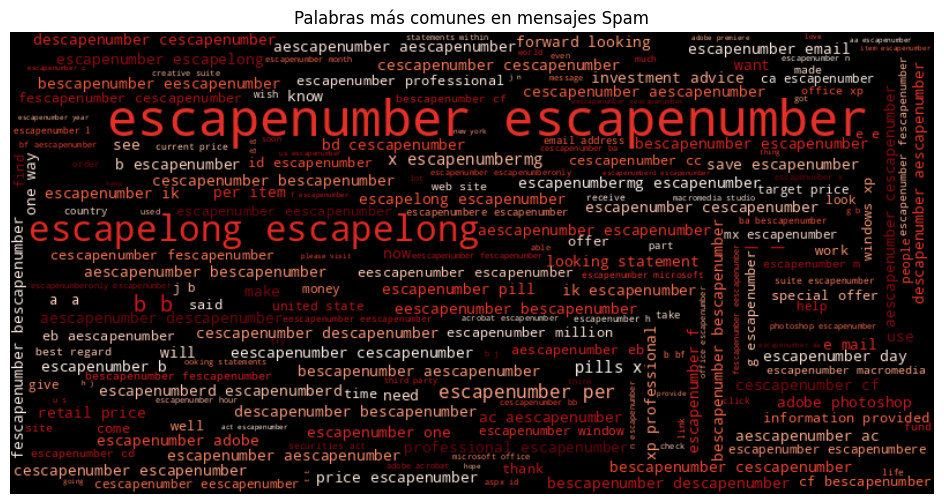

In [24]:
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más comunes en mensajes Spam')
plt.show()

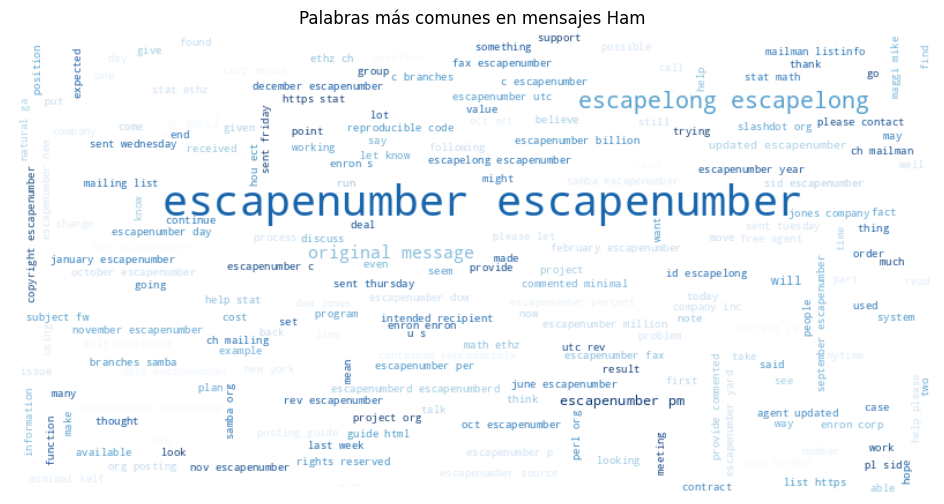

In [25]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más comunes en mensajes Ham')
plt.show()